In [80]:
import pandas as pd
import pickle 
import os
import numpy as np
from matplotlib import pyplot as plt

In [81]:
def count_subdirectories(directory):
    return sum(os.path.isdir(os.path.join(directory, name)) for name in os.listdir(directory))

directory = 'GNSS_fiveminute'
subdirectory_count = count_subdirectories(directory)
print(f"子文件夹数量: {subdirectory_count}")

子文件夹数量: 402


In [169]:
earthquake_magnitudes_threshold = 5.5
#选取周围正方形多大的空间
space_size = 0.8#（+-0.2）

In [171]:
lat_min, lat_max = 32, 36
lon_min, lon_max = -120.0, -114.0
lat_step, lon_step = 0.1, 0.1
lat_bins = np.around(np.linspace(lat_min, lat_max, 41),2)

lon_bins = np.around(np.linspace(lon_min, lon_max, 61),2)
np.random.shuffle(lat_bins)
np.random.shuffle(lon_bins)
find = False
for lat in lat_bins:
    for lon in lon_bins:
        file_path = f"grid_data/grid_{lat}_{lon}.csv"
        if os.path.exists(file_path) and os.path.getsize(file_path) > 0:
            try:
                data = pd.read_csv(file_path)
            except pd.errors.EmptyDataError:
                continue
        data['Time'] = pd.to_datetime(data['Time'], format='ISO8601')
        if len(data[(data['Magnitude'] > earthquake_magnitudes_threshold) & (data['Time'] > '2005-01-01')]) >0:
            print(data[(data['Magnitude'] > earthquake_magnitudes_threshold) & (data['Time'] > '2005-01-01')])
            print(file_path)
            index = data[(data['Magnitude'] > earthquake_magnitudes_threshold) & (data['Time'] > '2005-01-01')].index[0]
            find = True
            break
    if find:
        break


             ID                             Time  Magnitude  Latitude  \
323  ci14565620 2009-12-30 18:48:57.330000+00:00        5.8    32.464   

      Longitude  Depth  Location_id  
323 -115.189167  5.971          288  
grid_data/grid_32.4_-115.2.csv


In [172]:
earthquake = pd.read_csv(f"grid_data/grid_{lat}_{lon}.csv")

In [173]:
earthquake.iloc[index]
earthquake_lat = earthquake.iloc[index]['Latitude']
earthquake_lon = earthquake.iloc[index]['Longitude']
time = earthquake.iloc[index]['Time']
magnitude = earthquake.iloc[index]['Magnitude']
print(f"Latitude: {earthquake_lat}, Longitude: {earthquake_lon}, Time: {time}", f"Magnitude: {magnitude}")


Latitude: 32.464, Longitude: -115.1891667, Time: 2009-12-30 18:48:57.330000+00:00 Magnitude: 5.8


In [174]:
import pandas as pd

def split_and_combine_date(datetime_str):
    """
    将时间字符串转换为年、月、日和具体时间，并将年、月、日重新组合成一个新的日期字符串。
    
    参数:
    datetime_str (str): 时间字符串，格式为 'YYYY-MM-DD HH:MM:SS.ssssss+00:00'
    
    返回:
    tuple: 包含新的日期字符串和具体时间的元组
    """
    datetime_obj = pd.to_datetime(datetime_str)
    
    # 提取年、月、日和具体时间
    year = datetime_obj.year
    month = datetime_obj.month
    day = datetime_obj.day
    time = datetime_obj.time()
    
    # 重新组合年、月、日成新的日期字符串
    date_str = f"{year:04d}-{month:02d}-{day:02d}"
    
    return date_str, time

date,accuracy_time = split_and_combine_date(time)
date,accuracy_time

('2009-12-30', datetime.time(18, 48, 57, 330000))

In [175]:
from datetime import datetime

def time_to_five_minute_interval(time_obj):
    total_minutes = time_obj.hour * 60 + time_obj.minute
    five_minute_interval = total_minutes // 5
    return five_minute_interval
time_str = accuracy_time

five_minute_interval = time_to_five_minute_interval(time_str)
five_minute_interval

225

In [176]:
station_dict = pickle.load(open('station_dict/station_dict_use.pkl', 'rb'))

In [177]:
use_dict = {}
lat_min = earthquake_lat - space_size
lat_max = earthquake_lat + space_size
lon_min = earthquake_lon - space_size
lon_max = earthquake_lon + space_size
for key in station_dict.keys():
    lat, lon = station_dict[key]
    lat = np.around((lat), 2)
    lon = np.around((lon), 2)
    if lat < lat_min or lat > lat_max or lon < lon_min or lon > lon_max:
        continue
    else:
        use_dict[key] = (lat, lon)

In [178]:
print(use_dict)

{'AZYA': (32.69, -114.6), 'AZYU': (32.66, -114.53), 'AZYW': (32.68, -114.64), 'COAG': (32.86, -115.12), 'CRRS': (33.07, -115.74), 'DAEX': (32.22, -115.42), 'ERRG': (33.12, -115.82), 'FSHB': (32.94, -115.8), 'GMPK': (33.05, -114.83), 'IID2': (32.71, -115.03), 'MXGE': (32.64, -115.48), 'MXGM': (32.64, -115.48), 'MXGW': (32.64, -115.48), 'MXS1': (32.64, -115.47), 'NAYX': (32.32, -115.3), 'P492': (32.89, -115.97), 'P493': (32.96, -115.82), 'P494': (32.76, -115.73), 'P495': (33.04, -115.63), 'P496': (32.75, -115.6), 'P497': (32.84, -115.58), 'P498': (32.9, -115.57), 'P499': (32.98, -115.49), 'P500': (32.69, -115.3), 'P501': (32.88, -115.4), 'P502': (32.98, -115.42), 'P503': (32.95, -115.72), 'P507': (33.2, -115.61), 'P508': (33.25, -115.43), 'P509': (32.89, -115.29), 'P510': (33.14, -115.34), 'P744': (32.83, -115.51), 'P796': (32.5, -114.76), 'PB1Y': (32.65, -115.69), 'PHJX': (32.49, -115.55), 'QUEX': (32.55, -115.15), 'RUNG': (32.97, -114.98), 'YUHG': (32.65, -115.92), 'YUMX': (32.03, -115

In [179]:
space_size

0.8

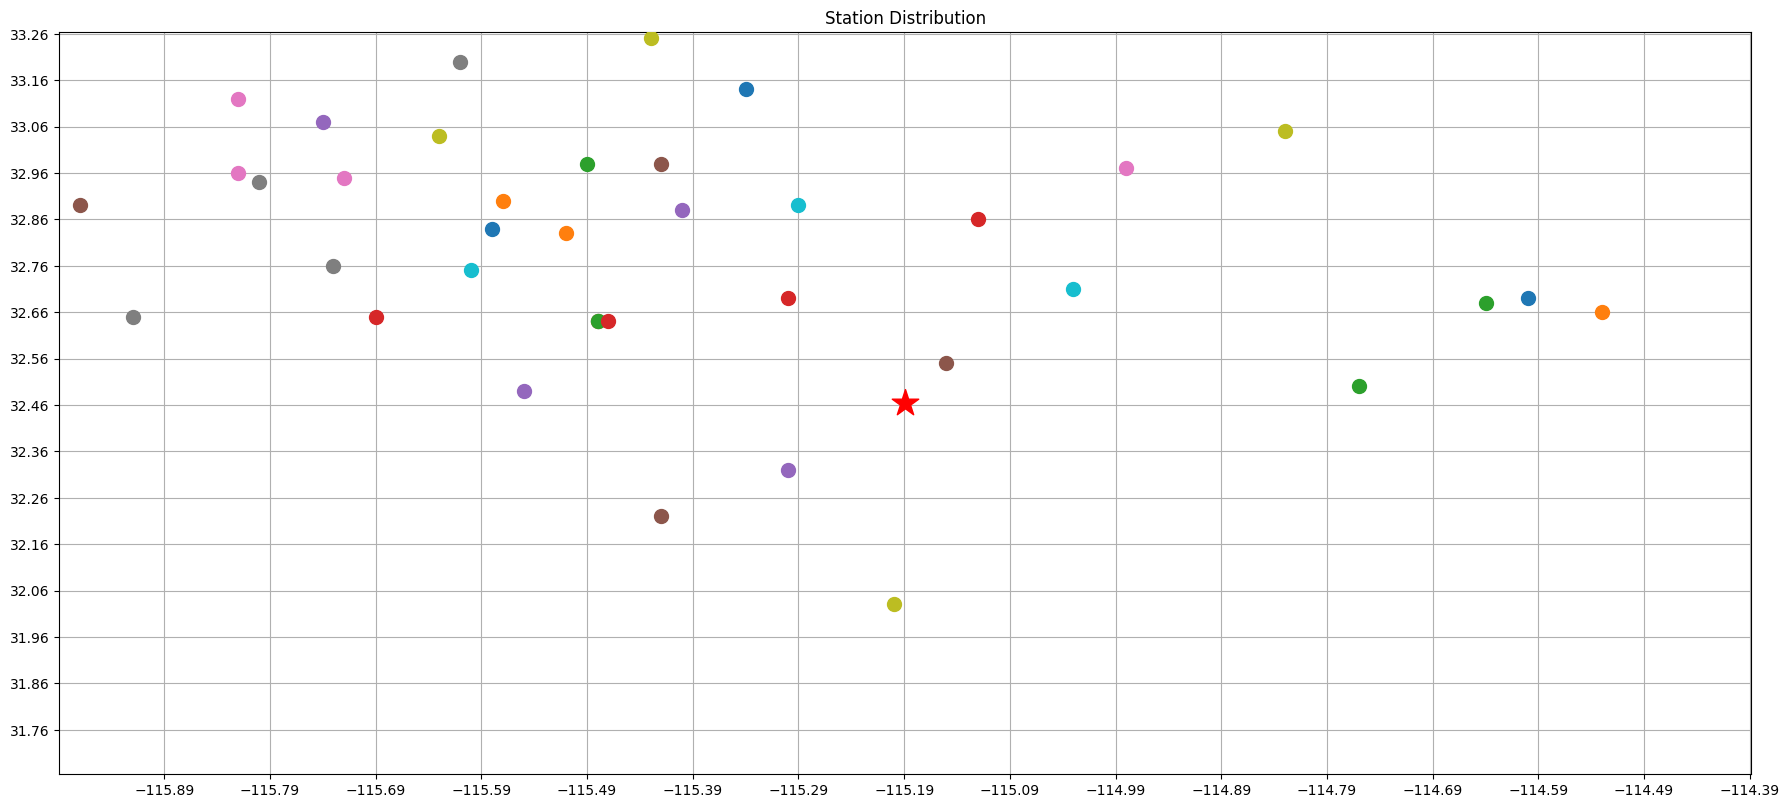

In [180]:
plt.figure(figsize=(18, 8))
for key in use_dict.keys():
    lat, lon = use_dict[key]
    plt.scatter(lon, lat, s=100, zorder=5, label=key)
plt.xticks(np.around(np.linspace(lon_min, lon_max, 2*int(space_size*10)+1), 2))
plt.yticks(np.around(np.linspace(lat_min, lat_max, 2*int(space_size*10)+1), 2))
plt.xlim(lon_min, lon_max)
plt.ylim(lat_min, lat_max)
plt.scatter(earthquake_lon, earthquake_lat, s=400, zorder=10, marker='*', color='red', label='Earthquake'+str(magnitude))
plt.grid(True)
# plt.legend()
plt.tight_layout()
plt.title('Station Distribution')
plt.show()

In [181]:
date[:4]

'2009'

In [182]:
earthquake_occurrence_4 = pd.DataFrame(columns=['Latitude', 'Longitude', 'Magnitude', 'Time'])
for lat in lat_bins:
    for lon in lon_bins:
        file_path = f"grid_data/grid_{lat}_{lon}.csv"
        if os.path.exists(file_path) and os.path.getsize(file_path) > 0:
            try:
                data = pd.read_csv(file_path)
            except pd.errors.EmptyDataError:
                continue
            
            data['Time'] = pd.to_datetime(data['Time'], format='ISO8601')
            mask_time = (data["Time"] > f"{date[:4]}-01-01") & (data["Time"] < f"{date[:4]}-12-31")
            mask_area = (data["Latitude"] > lat_min) & (data["Latitude"] < lat_max) & (data["Longitude"] > lon_min) & (data["Longitude"] < lon_max)
            mask_magnitude = data["Magnitude"] > 4
            filtered_data = data[mask_time & mask_area & mask_magnitude]
            if len(filtered_data) > 0:
                earthquake_occurrence_4 = pd.concat([earthquake_occurrence_4, filtered_data])

/tmp/ipykernel_31942/267543959.py:17: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  earthquake_occurrence_4 = pd.concat([earthquake_occurrence_4, filtered_data])


In [183]:
earthquake_occurrence_3 = pd.DataFrame(columns=['Latitude', 'Longitude', 'Magnitude', 'Time'])
for lat in lat_bins:
    for lon in lon_bins:
        file_path = f"grid_data/grid_{lat}_{lon}.csv"
        if os.path.exists(file_path) and os.path.getsize(file_path) > 0:
            try:
                data = pd.read_csv(file_path)
            except pd.errors.EmptyDataError:
                continue
            
            data['Time'] = pd.to_datetime(data['Time'], format='ISO8601')
            mask_time = (data["Time"] > f"{date[:4]}-01-01") & (data["Time"] < f"{date[:4]}-12-31")
            mask_area = (data["Latitude"] > lat_min) & (data["Latitude"] < lat_max) & (data["Longitude"] > lon_min) & (data["Longitude"] < lon_max)
            mask_magnitude = (data["Magnitude"] < 4) & (data["Magnitude"] > 3 )
            filtered_data = data[mask_time & mask_area & mask_magnitude]
            if len(filtered_data) > 0:
                earthquake_occurrence_3 = pd.concat([earthquake_occurrence_3, filtered_data])

/tmp/ipykernel_31942/1307853426.py:17: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  earthquake_occurrence_3 = pd.concat([earthquake_occurrence_3, filtered_data])


In [184]:
def date_to_day_of_year(date_str):
    date_obj = datetime.strptime(date_str, '%Y-%m-%d')
    day_of_year = date_obj.timetuple().tm_yday
    return day_of_year

In [185]:
earthquake_day_of_year_list_4 = []
earthquake_magnitudes_list_4 = []
for i in range(len(earthquake_occurrence_4)):
    date_str = earthquake_occurrence_4.iloc[i]['Time']
    date,_ = split_and_combine_date(date_str)
    day_of_year = date_to_day_of_year(date)
    earthquake_day_of_year_list_4.append(day_of_year)
    earthquake_magnitudes_list_4.append(earthquake_occurrence_4.iloc[i]['Magnitude'])

In [186]:
earthquake_day_of_year_list_3 = []
earthquake_magnitudes_list_3 = []
for i in range(len(earthquake_occurrence_3)):
    date_str = earthquake_occurrence_3.iloc[i]['Time']
    date,_ = split_and_combine_date(date_str)
    day_of_year = date_to_day_of_year(date)
    earthquake_day_of_year_list_3.append(day_of_year)
    earthquake_magnitudes_list_3.append(earthquake_occurrence_3.iloc[i]['Magnitude'])

In [187]:
gnss_data_station = []
for i in use_dict.keys():
        gnss_data_station.append(i)

In [188]:
def moving_average_with_strength(data, window_size=5, strength=1.0):
    """
    计算给定数据的滑动平均值，并使用强度参数来调整平滑程度，且保持数据长度。
    在边缘使用较小的窗口进行平滑。

    参数:
    data (list or np.array): 需要平滑的数据
    window_size (int): 滑动窗口的大小
    strength (float): 平滑强度参数，值越大，曲线越平滑 (1.0为默认，不加权)

    返回:
    np.array: 平滑后的数据，且与原始数据长度一致
    """
    adjusted_window_size = int(window_size * strength)
    

    if adjusted_window_size < 1:
        adjusted_window_size = 1
    smoothed_data = np.zeros_like(data, dtype=float)

    for i in range(len(data)):
        left_index = max(0, i - adjusted_window_size // 2)
        right_index = min(len(data), i + adjusted_window_size // 2 + 1)
        current_window = data[left_index:right_index]
        # 对窗口内的值求平均
        smoothed_data[i] = np.mean(current_window)

    return smoothed_data


In [189]:
# for i in range(len(gnss_data_list)):    
#     plt.title(gnss_data_station[i])
#     gnss_data = gnss_data_list[i]
#     plt.plot(gnss_data['___v-ref(m)'],color='#E6E6FA')
#     plt.plot(five_minute_interval, gnss_data['___v-ref(m)'][five_minute_interval], 'r*')
#     plt.plot(moving_average_with_strength(gnss_data['___v-ref(m)'], 5, 1.0), 'purple',linestyle='--')
#     plt.xlabel('Five-minute interval(h)')
#     plt.ylabel('Vertical position (m)')
#     plt.xticks(range(1, 288, 12), range(0, 24, 1))
#     plt.show()


In [190]:
day_GNSS_list = []
for i in range(len(gnss_data_station)):
    day_GNSS_list.append(pd.read_csv('GNSS_day/'+gnss_data_station[i],sep = '\s+'))

In [191]:
day_GNSS_use_list = []
def convert_date(row):
    date_str = row['YYMMMDD']
    date_parsed = datetime.strptime(date_str, '%y%b%d')
    year = date_parsed.year
    day_of_year = date_parsed.timetuple().tm_yday
    return pd.Series([year, day_of_year])

for i in range(len(day_GNSS_list)):
    day_GNSS = day_GNSS_list[i]
    day_GNSS[['year', 'day_of_year']] = day_GNSS.apply(convert_date, axis=1)
    day_GNSS_use_list.append(day_GNSS)

In [192]:
date

'2009-12-30'

In [193]:
day_GNSS_year

,site,YYMMMDD,yyyy.yyyy,__MJD,week,d,reflon,_e0(m),__east(m),____n0(m),...,sig_n(m),sig_u(m),__corr_en,__corr_eu,__corr_nu,_latitude(deg),_longitude(deg),__height(m),year,day_of_year


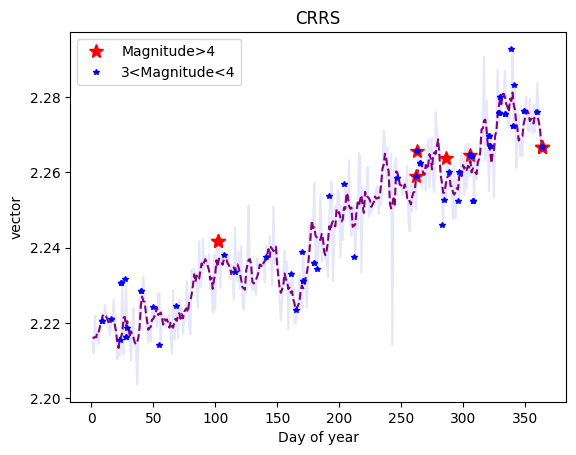

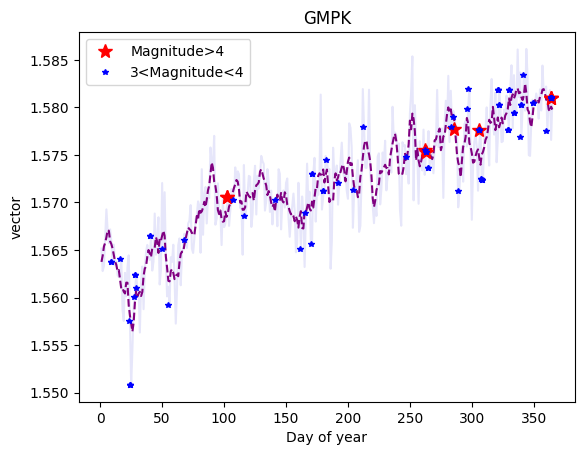

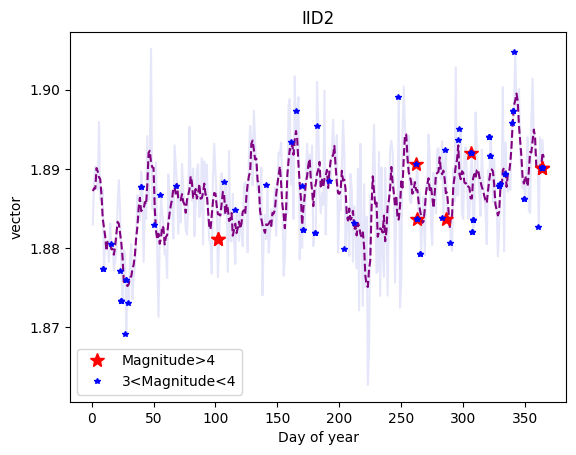

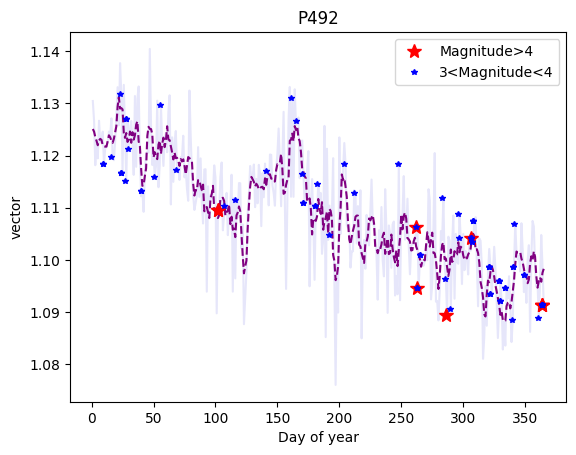

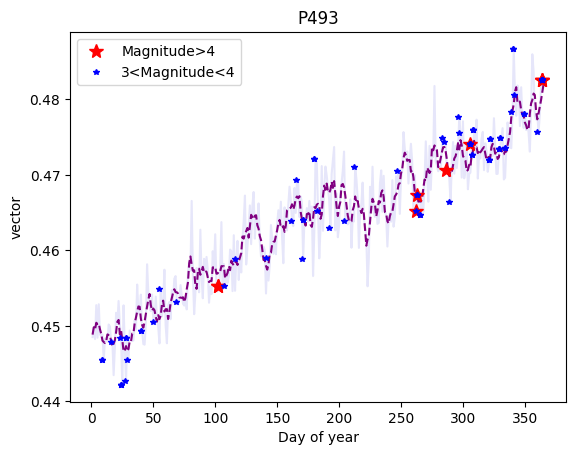

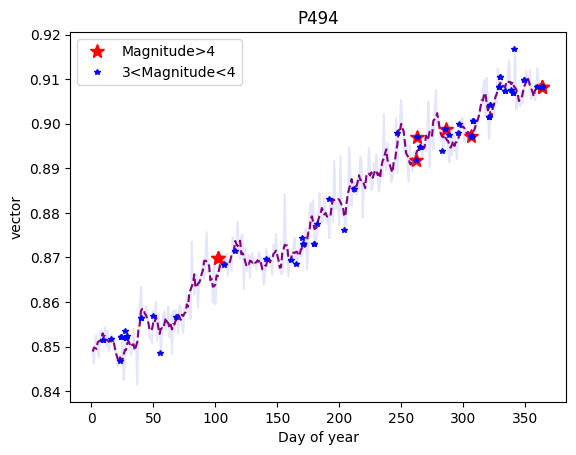

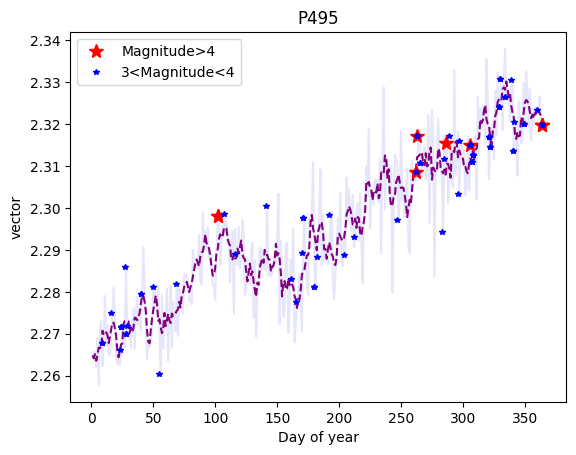

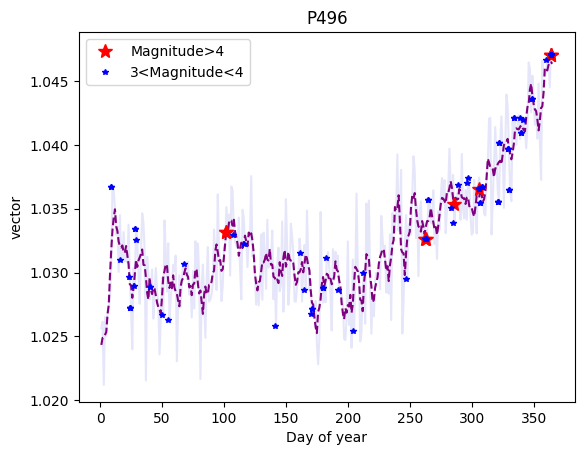

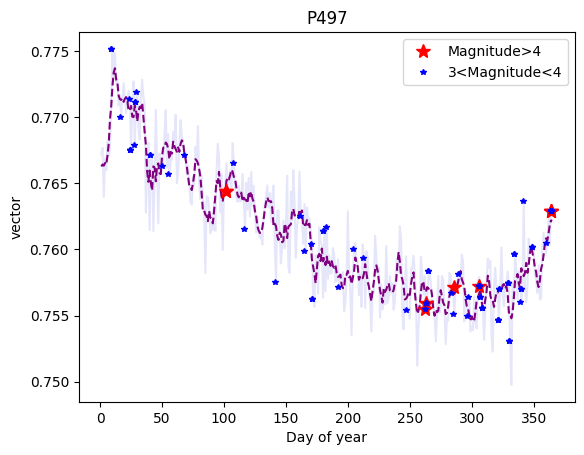

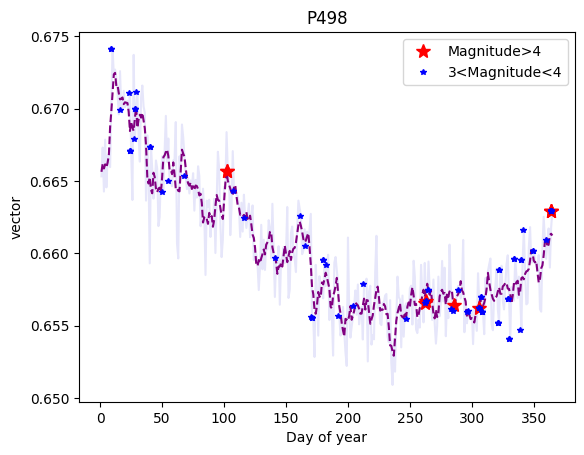

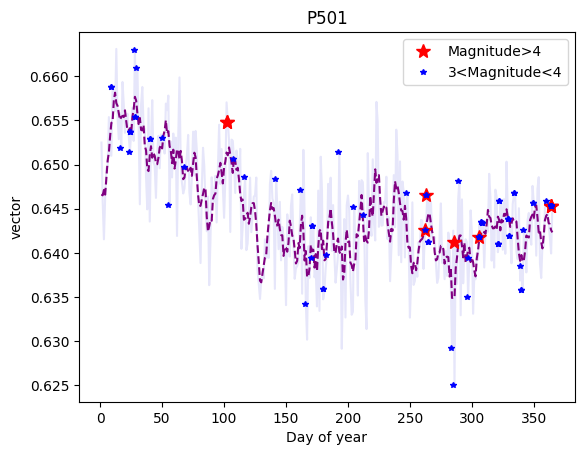

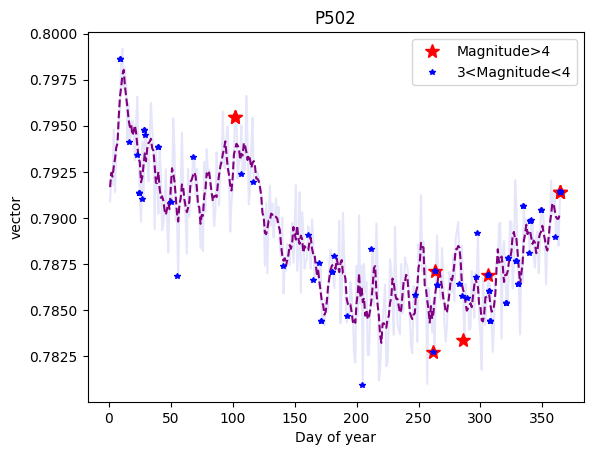

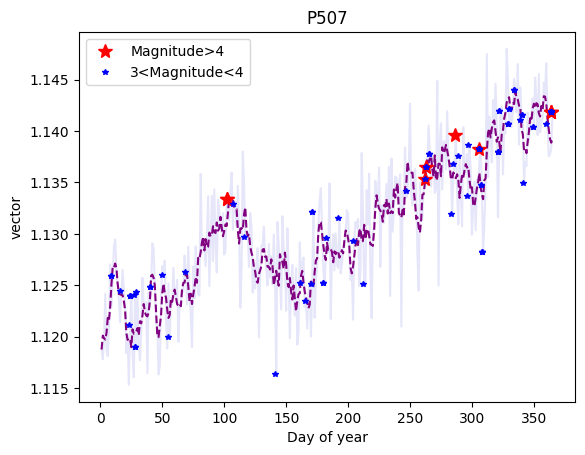

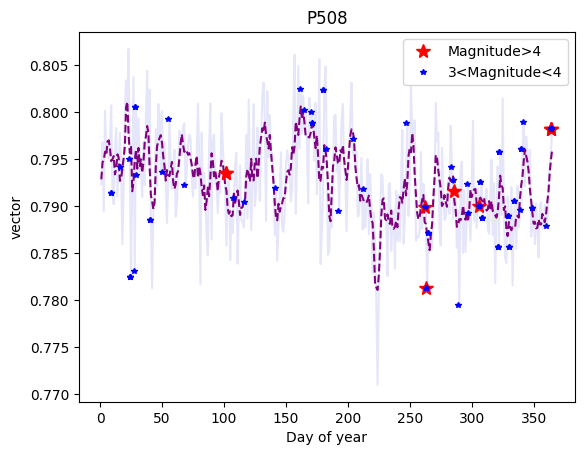

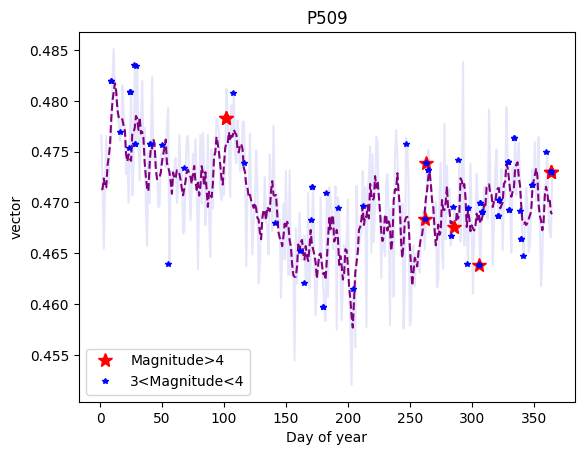

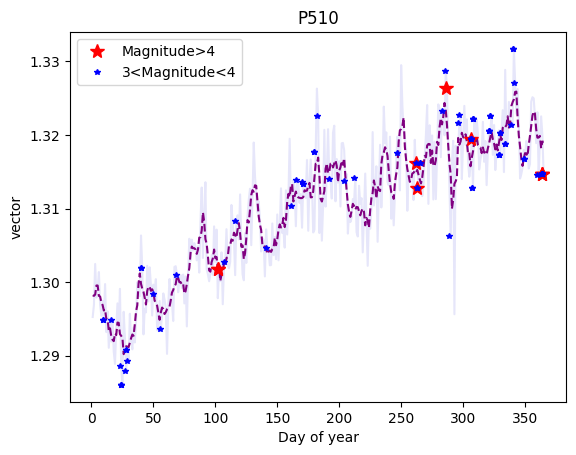

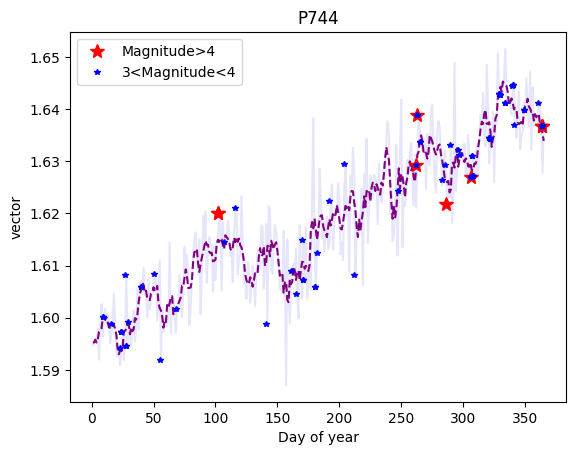

In [194]:
for i in range(len(day_GNSS_use_list)):
    day_GNSS_year = day_GNSS_use_list[i][day_GNSS_use_list[i]["year"] == int(date[:4])]
    if len(day_GNSS_year) == 365:
        plt.title(day_GNSS_year['site'].iloc[0])

        n = day_GNSS_year['_north(m)']
        e = day_GNSS_year['__east(m)']
        u = day_GNSS_year['____up(m)']

        vector = e**2 + n**2 + u**2

        plt.plot(day_GNSS_year['day_of_year'], vector,color='#E6E6FA')
        plt.plot(day_GNSS_year['day_of_year'],moving_average_with_strength(vector, 5, 1.0), 'purple',linestyle='--')
        plt.plot(earthquake_day_of_year_list_4, vector.iloc[earthquake_day_of_year_list_4], 'r*',markersize = 10,label= "Magnitude>4")
                 
        plt.plot(earthquake_day_of_year_list_3, vector.iloc[earthquake_day_of_year_list_3], 'b*',markersize = 4,label= "3<Magnitude<4")
        plt.xlabel('Day of year')
        plt.ylabel("vector")
        plt.legend()
        plt.show()
